MAMOGRAFİ VERİ SETİ ANALİZİ

Mamografi veri seti;

Kategori1,
Kategori2Sol,
Kategori2Sag,
Kategori4Sol,
Kategori4Sag,
Kategori5Sol,
Kategori5Sag

dosyalarından oluşmaktadır.

1- Kategorilerin Sol-Sağ ayrımı

In [ ]:
main_folder_path = r'D:\mamografi-dataset\Kategori1'

kategori1_sag_path = r'D:\mamografi-dataset\Kategori1Sag'
kategori1_sol_path = r'D:\mamografi-dataset\Kategori1Sol'

os.makedirs(kategori1_sag_path, exist_ok=True)
os.makedirs(kategori1_sol_path, exist_ok=True)

for root, dirs, files in os.walk(main_folder_path):
    for dir_name in dirs:
        dir_path = os.path.join(root, dir_name)
        for file_name in os.listdir(dir_path):
            file_path = os.path.join(dir_path, file_name)
            if file_name.endswith('.dcm'):
                if 'RCC' in file_name or 'RMLO' in file_name:
                    shutil.move(dir_path, kategori1_sag_path)
                elif 'LCC' in file_name or 'LMLO' in file_name:
                    shutil.move(dir_path, kategori1_sol_path)
                break
    break

print("Dosyalar başarıyla taşındı.")

2- Aynı kategorinin sol ve sağ dosyalarının birleştirilmesi

In [ ]:
kategori2_sag_path = r'D:\mamografi-dataset\Kategori2Sag'
kategori2_sol_path = r'D:\mamografi-dataset\Kategori2Sol'
kategori2_path = r'D:\mamografi-dataset\Kategori2'

os.makedirs(kategori2_path, exist_ok=True)

all_patient_dirs = []

for root, dirs, files in os.walk(kategori2_sag_path):
    for dir_name in dirs:
        dir_path = os.path.join(root, dir_name)
        all_patient_dirs.append(dir_path)
    break

for root, dirs, files in os.walk(kategori2_sol_path):
    for dir_name in dirs:
        dir_path = os.path.join(root, dir_name)
        all_patient_dirs.append(dir_path)
    break 

# ID sıralama kucuk -> buyuk
all_patient_dirs.sort(key=lambda x: int(os.path.basename(x)))

for dir_path in all_patient_dirs:
    dir_name = os.path.basename(dir_path)
    new_dir_path = os.path.join(kategori2_path, dir_name)
    shutil.move(dir_path, new_dir_path)

print("Dosyalar başarıyla birleştirildi ve sıralandı.")

3- 
* Kategoriler içindeki toplam hasta sayısını görüntüleme,
* Hasta id'lerinin benzersiz olup olmadığının kontrolü

In [5]:
import os
from collections import defaultdict

category_file_name = "Kategori5Sol"

root_folder_path =  r'D:\mamografi-dataset\Kategori5Sol'

dicom_files = []
sum_dicom_files = 0

patient_id_dict = defaultdict(list)
num_patient_folders = 0

for root, dirs, files in os.walk(root_folder_path):       
    for dir_name in dirs:
        num_patient_folders += 1
        patient_id_dict[dir_name].append(os.path.join(root, dir_name))
    # Sadece ilk seviye alt klasörleri kontrol etmek için bir defa döngüye girip çıkmak yeterli
    break

print(f"{category_file_name} içindeki toplam hasta sayısı: {num_patient_folders}")

# Aynı ID'den birden fazla olup olmadığını kontrol etme
duplicate_ids = {id: paths for id, paths in patient_id_dict.items() if len(paths) > 1}

if duplicate_ids:
    print("Aynı ID'ye sahip klasörler bulundu:")
    for id, paths in duplicate_ids.items():
        print(f"ID: {id} - Klasörler: {paths}")
else:
    print("Tüm hasta ID'leri benzersiz.")

Kategori5Sol içindeki toplam hasta sayısı: 282
Tüm hasta ID'leri benzersiz.


4- 
* Her hasta klasöründe 2 adet dicom görüntüsünün bulunup bulunmadığının kontrolü,
* Kategori klasörünün altında bulunan tüm hasta klasörlerinin içindeki toplam dicom görüntü sayısı

In [6]:
directory = r'D:\mamografi-dataset\Kategori5Sol'

# 2'den az veya fazla DICOM dosyası içeren dizinleri saklamak için bir liste
incorrect_dirs = []
sum_dicom_files = 0

for dir_name in os.listdir(directory):
    subdir_path = os.path.join(directory, dir_name)
    if os.path.isdir(subdir_path):
        # Sadece DICOM dosyalarını saymak için
        dicom_files = [file for file in os.listdir(subdir_path) if file.endswith('.dcm')]
        sum_dicom_files = sum_dicom_files + len(dicom_files)
        # Eğer DICOM dosyası sayısı 2'den az veya fazla ise
        if len(dicom_files) != 2:
            incorrect_dirs.append((dir_name, len(dicom_files)))

print(f"2'den az veya fazla DICOM dosyası içeren dizin sayısı: {len(incorrect_dirs)}")
for dir_name, count in incorrect_dirs:
    print(f"ID: {dir_name}, DICOM Dosyası Sayısı: {count}")

print(f"toplam DICOM dosyası sayısı: {sum_dicom_files}")

2'den az veya fazla DICOM dosyası içeren dizin sayısı: 0
toplam DICOM dosyası sayısı: 564


5- Bir kategoride bulunan bir hasta başka bir kategori içerisinde de bulunuyor mu kontrolü yapılarak bir hastanın sadece tek bir kategoriye ait olduğu görülmekte.

In [12]:
import os
from collections import defaultdict

# Ana klasörlerin yollarını belirtin
category_paths = [
    r'D:\mamografi-dataset\Kategori1',
    r'D:\mamografi-dataset\Kategori2Sol',
    r'D:\mamografi-dataset\Kategori4Sol',
    r'D:\mamografi-dataset\Kategori5Sol',
    r'D:\mamografi-dataset\Kategori2Sag',
    r'D:\mamografi-dataset\Kategori4Sag',
    r'D:\mamografi-dataset\Kategori5Sag',
]

id_locations = defaultdict(list)
sum_id = 0

for category_path in category_paths:
    for root, dirs, files in os.walk(category_path):
        for dir_name in dirs:
            sum_id = sum_id +1
            dir_path = os.path.join(root, dir_name)
            id_locations[dir_name].append(category_path)
        break

# Birden fazla bulunan ID'leri ve hangi dosyalarda olduğunu kontrol etmek
duplicate_ids = {id: locations for id, locations in id_locations.items() if len(locations) > 1}

if duplicate_ids:
    print("Birden fazla bulunan ID'ler ve bulundukları dosyalar:")
    for id, locations in duplicate_ids.items():
        print(f"ID: {id} - Dosyalar: {', '.join(locations)}")
else:
    print("Tüm ID'ler benzersiz.")
    
print("Tüm kategorilerdeki toplam hasta sayısı:",sum_id)


Tüm ID'ler benzersiz.
Tüm kategorilerdeki toplam hasta sayısı: 2721


6- Örnek bir dicom görüntüsünün değerlerinin görüntülenmesi

In [2]:
import os
root_folder_path = r'D:\mamografi-dataset\Kategori1'

# Hasta ID klasörlerini al
hasta_ids = [os.path.join(root_folder_path, subdir) for subdir in os.listdir(root_folder_path) if os.path.isdir(os.path.join(root_folder_path, subdir))]

# Tüm DICOM dosyalarını listele
dicom_files = []
for hasta_id in hasta_ids:
    dicom_files.extend([os.path.join(hasta_id, file) for file in os.listdir(hasta_id) if file.endswith('.dcm')])

In [6]:
import pydicom
pydicom.dcmread(dicom_files[0])

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 192
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Digital Mammography X-Ray Image Storage - For Presentation
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.840.10009.1.2.3.10001.20001.100001
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.30071.8
(0002,0013) Implementation Version Name         SH: 'fo-dicom 4.0.7'
(0002,0016) Source Application Entity Title     AE: 'TEKNOFEST'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 192'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', '', '', '', '', '', '', '50000']
(0008,0018) SOP Instance UID                    UI: 1.2.840.10009.1.2.3.10001.20001.100001
(0008,0020) Study Date        

7- Hasta id'sine göre bounding box görüntüleme

Rescale Intercept: 0
Rescale Slope: 1
Güncellenmiş x1: 1942.597, y1: 1288.3645, x3: 2141.1472, y2: 1500.67551


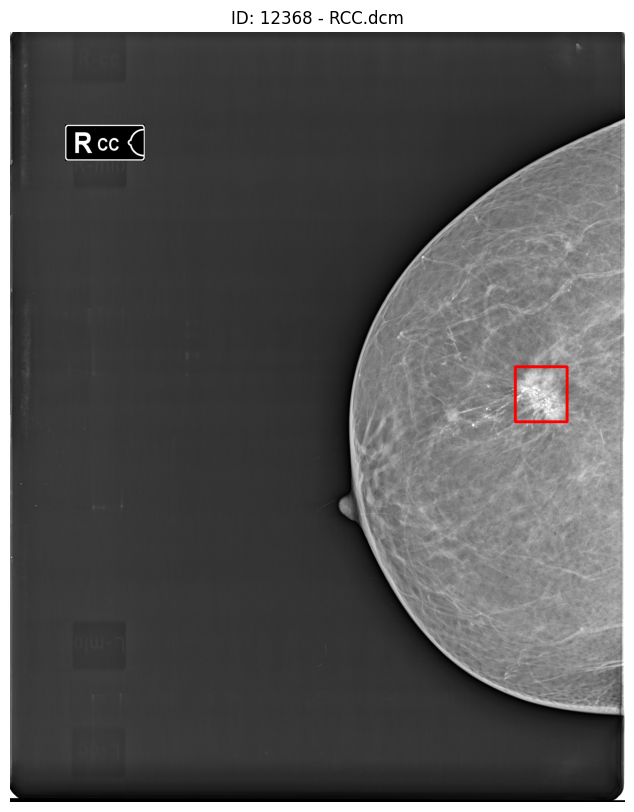

In [13]:
import os
import pydicom
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosya yolu
excel_file = r'D:\mamografi-dataset\veribilgisi.xlsx'

df = pd.read_excel(excel_file)

# DICOM dosyasının yolu
dicom_file = r'D:\mamografi-dataset\Kategori5\12368\RCC.dcm'  # Tek bir dosya seçilmeli

dicom_data = pydicom.dcmread(dicom_file)

phInter = dicom_data.PhotometricInterpretation
img = dicom_data.pixel_array.astype(np.float32) 

rescale_intercept = getattr(dicom_data, 'RescaleIntercept', 0)
rescale_slope = getattr(dicom_data, 'RescaleSlope', 1)

print(f"Rescale Intercept: {rescale_intercept}")
print(f"Rescale Slope: {rescale_slope}")

# Piksel değerlerini gerçek değerlere dönüştür
img = (img * rescale_slope) + rescale_intercept

# MONOCHROME1 için piksel değerlerini tersine çevir
if phInter == 'MONOCHROME1':
    img = np.max(img) - img  # Piksel değerlerini tersine çevir

# Pencereleme bilgilerini al
window_center = dicom_data.WindowCenter
window_width = dicom_data.WindowWidth

window_rows = dicom_data.Rows / 2
window_columns = dicom_data.Columns / 2

# Pencereleme bilgilerini işle
if isinstance(window_center, pydicom.multival.MultiValue):
    window_center = window_center[0]
if isinstance(window_width, pydicom.multival.MultiValue):
    window_width = window_width[0]

# Pikselleri pencereleme
min_window = window_center - (window_width / 2)
max_window = window_center + (window_width / 2)

# Normalizasyon ve kesme işlemi
img = np.clip(img, min_window, max_window)
img = (img - min_window) / (max_window - min_window)
img = (img * 255).astype(np.uint8)  # 0-255 aralığına normalize et ve uint8'e çevir

# Koordinat bilgilerini DataFrame'den al
file_name = os.path.basename(dicom_file)
hasta_id = os.path.basename(os.path.dirname(dicom_file)).strip().upper()

df['HASTA ID'] = df['HASTA ID'].astype(str).str.strip()
df['DOSYA ADI'] = df['DOSYA ADI'].astype(str).str.strip()

# DataFrame'de Hasta ID ve Dosya Adı ile eşleşen satırı bul
matched_row = df[(df['HASTA ID'] == hasta_id) & (df['DOSYA ADI'] == file_name)]

# Bounding box bilgisini al
bounding_box = None
if not matched_row.empty:
    bounding_box = matched_row['ETİKET KOORDİNATLARI'].values[0]
    label_name = matched_row[matched_row['ETİKET KOORDİNATLARI'] == bounding_box]['ETİKET ADI'].values[0]
    
    if pd.notna(bounding_box):
        # Koordinatları noktalı virgülle ayır ve float'a dönüştür
        coordinates = [list(map(float, coord.split(','))) for coord in bounding_box.split(';')]
        bounding_box = np.array(coordinates)

        # İlk koordinatlar: x1, x3
        x1, x3 = bounding_box[0][0], bounding_box[2][0]
        
        # Üçüncü koordinatlar: y1, y2
        y1, y2 = bounding_box[0][1], bounding_box[1][1]

        # Koordinatları window center'a göre güncelle
        x1 = x1 + window_columns
        x3 = x3 + window_columns
        y1 = y1 + window_rows
        y2 = y2 + window_rows

        # Genişlik ve yükseklik hesapla
        width = abs(x3 - x1)
        height = abs(y2 - y1)

        # Koordinatları kontrol etmek için
        print(f"Güncellenmiş x1: {x1}, y1: {y1}, x3: {x3}, y2: {y2}")

        # Grayscale görüntüyü RGB'ye çevir.
        img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

        # Bounding box çiz
        if 0 <= x1 <= img.shape[1] and 0 <= x3 <= img.shape[1] and 0 <= y1 <= img.shape[0] and 0 <= y2 <= img.shape[0]:
            start_point = (int(x1), int(y1))
            end_point = (int(x3), int(y2))
            if label_name == 'Kitle':
                img_rgb = cv2.rectangle(img_rgb, start_point, end_point, (255, 0, 0), 10)  # RGB kırmızı (255, 0, 0)
            else:
                img_rgb = cv2.rectangle(img_rgb, start_point, end_point, (0, 0, 255), 10)  # RGB mavi (0, 0, 255)
        else:
            print("Koordinatlar görüntü sınırları dışında.")
    else:
        print("Bounding box bilgisi yok.")

# Görseli göster
plt.figure(figsize=(10, 10))  # Görsel boyutunu ayarla
plt.imshow(img_rgb)
plt.axis('off')  # Eksenleri kapat
plt.title(f"ID: {hasta_id} - {file_name}")
plt.show()

-Tüm dicom görsellerinin Intercept ve Slope değerlerinin kontrol edilmesi, 
Intercept değeri 0'dan ve Slope değeri 1'den farklı olan dosyaları bulma işlemi

***Hiçbir dicom dosyasında Intercept değeri 0'dan, Slope değeri 1'den farklı değil!!

In [1]:
import os

import pydicom
 
# DICOM dosyalarının bulunduğu klasör

dicom_folder = r'D:\mamografi-dataset'
 
# Klasördeki tüm DICOM dosyalarını işle

for root, _, files in os.walk(dicom_folder):

    for file in files:

        if file.endswith('.dcm'):

            dicom_path = os.path.join(root, file)

            dicom_data = pydicom.dcmread(dicom_path)
 
            # Varsayılan değerler

            intercept = getattr(dicom_data, "RescaleIntercept", 0)

            slope = getattr(dicom_data, "RescaleSlope", 1)
 
            # 0 ve 1'den farklı olanları belirt

            if intercept != 0 or slope != 1:

                print(f"⚠️ Farklı değer bulundu: {file} -> Intercept: {intercept}, Slope: {slope}")

 

8- 
* DICOM görüntülerinin monochrome kontrolü,
* DICOM dosyalarındaki görüntülerin inverse + pencereleme işleminni gerçekleştirilmesi,
* Kategorilerde bulunan görüntülerin tüm bounding boxları işaretlenmiş olarak subplot edilmesi,
* Subplot edilen dosyada her bir görüntü için label (Hasta ID'si ve piksel değerlerinin min, mean, max değerleri) eklenmesi.

In [3]:
import os
import pydicom
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

excel_file = r'D:\mamografi-dataset\veribilgisi.xlsx'

df = pd.read_excel(excel_file)

root_folder_path = r'D:\mamografi-dataset\Kategori5'
output_image_path = r'D:\mamografi-dataset\Kategori5\combined_image_coord.png'
image_size = (256, 256)  # Görselleri yeniden boyutlandırma boyutu (px)

# Hasta ID klasörlerini al
hasta_ids = [os.path.join(root_folder_path, subdir) for subdir in os.listdir(root_folder_path) if os.path.isdir(os.path.join(root_folder_path, subdir))]

# Tüm DICOM dosyalarını listele
dicom_files = []
for hasta_id in hasta_ids:
    dicom_files.extend([os.path.join(hasta_id, file) for file in os.listdir(hasta_id) if file.endswith('.dcm')])

# Görselleri okuyup yeniden boyutlandır
images = []
labels = []
sumCoordOutImBound = 0 #toplam kaç tane koordinatları görüntü dışında görüntü olduğunun sayısı

for dicom_file in dicom_files:
    
    dicom_data = pydicom.dcmread(dicom_file)
    
    phInter = dicom_data.PhotometricInterpretation
    img = dicom_data.pixel_array.astype(np.float32)
    
    # MONOCHROME1 için piksel değerlerini tersine çevir
    if phInter == 'MONOCHROME1':
        img = np.max(img) - img  # Piksel değerlerini tersine çevir
    
    # Pencereleme bilgilerini al
    window_center = dicom_data.WindowCenter
    window_width = dicom_data.WindowWidth
    
    window_rows = dicom_data.Rows / 2
    window_columns = dicom_data.Columns / 2

    # Pencereleme bilgilerini işle
    if isinstance(window_center, pydicom.multival.MultiValue):
        window_center = window_center[0]
    if isinstance(window_width, pydicom.multival.MultiValue):
        window_width = window_width[0]

    # Pikselleri pencereleme
    min_window = window_center - (window_width / 2)
    max_window = window_center + (window_width / 2)
    
    # Normalizasyon ve kesme işlemi
    img = np.clip(img, min_window, max_window)
    img = (img - min_window) / (max_window - min_window)
    img = (img * 255).astype(np.uint8)  # 0-255 aralığına normalize et ve uint8'e çevir

    # Koordinat bilgilerini DataFrame'den al
    file_name = os.path.basename(dicom_file)
    hasta_id = os.path.basename(os.path.dirname(dicom_file))
    
    df['HASTA ID'] = df['HASTA ID'].astype(str).str.strip()
    df['DOSYA ADI'] = df['DOSYA ADI'].astype(str).str.strip()
    
    # DataFrame'de Hasta ID ve Dosya Adı ile eşleşen satırları bul
    matched_rows = df[(df['HASTA ID'] == hasta_id) & (df['DOSYA ADI'] == file_name)]

    # Grayscale görüntüyü RGB'ye çevirme işlemi
    img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    # Bounding box çiz
    if not matched_rows.empty:
        for idx, row in matched_rows.iterrows():
            bounding_box = row['ETİKET KOORDİNATLARI']
            label_name = row['ETİKET ADI']
            
            if pd.notna(bounding_box):
                # Koordinatları noktalı virgülle ayır ve float'a dönüştür
                coordinates = [list(map(float, coord.split(','))) for coord in bounding_box.split(';')]
                bounding_box = np.array(coordinates)

                # İlk koordinatlar: x1, x3
                x1, x3 = bounding_box[0][0], bounding_box[2][0]
                # Üçüncü koordinatlar: y1, y2
                y1, y2 = bounding_box[0][1], bounding_box[1][1]

                # Koordinatları window center'a göre güncelle
                x1 = x1 + window_columns
                x3 = x3 + window_columns
                y1 = y1 + window_rows
                y2 = y2 + window_rows

                # Bounding box çiz
                if 0 <= x1 <= img.shape[1] and 0 <= x3 <= img.shape[1] and 0 <= y1 <= img.shape[0] and 0 <= y2 <= img.shape[0]:
                    start_point = (int(x1), int(y1))
                    end_point = (int(x3), int(y2))
                    
                    if label_name == 'Kitle':
                        img_rgb = cv2.rectangle(img_rgb, start_point, end_point, (255, 0, 0), 10)  # RGB kırmızı (255, 0, 0)
                    else:
                        img_rgb = cv2.rectangle(img_rgb, start_point, end_point, (0, 0, 255), 10)  # RGB mavi (0, 0, 255)

                else:
                    print("--------------------------------------")
                    print(file_name)
                    print(hasta_id)
                    print("Koordinatlar görüntü sınırları dışında.")
                    print("--------------------------------------")
                    sumCoordOutImBound = sumCoordOutImBound +1
            else:
                print("Bounding box bilgisi yok.")
    else:
        print("Eşleşen satır bulunamadı.")

        
    # Görseli yeniden boyutlandır
    img_resized = cv2.resize(img_rgb, image_size, interpolation=cv2.INTER_AREA)
    
    # Hasta ID'sini ve piksel değerlerinin min, mean, max değerlerini al
    min_val, mean_val, max_val = dicom_data.pixel_array.min(), dicom_data.pixel_array.mean(), dicom_data.pixel_array.max()
    
    # Label oluştur
    label = f"ID: {hasta_id} Min: {min_val:.1f} Mean: {mean_val:.1f} Max: {max_val:.1f}"
    
    images.append(img_resized)
    labels.append(label)

# Görsellerin boyutları
num_images = len(images)
cols = 10  # Sütun sayısı
rows = (num_images + cols - 1) // cols  # Satır sayısını hesapla

# Her bir görsel ve etiketi alabileceğimiz bir figür oluşturma işlemi
fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
axes = axes.flatten()  # Axes dizisini düzleştir

for i in range(num_images):
    img_ax = axes[i]
    img_ax.imshow(images[i], cmap='gray')
    img_ax.axis('off')  # Eksenleri kapat
    
    # Görselin üstüne etiketi ekle
    img_ax.text(0.5, -0.1, labels[i], color='red', fontsize=8, ha='center', va='center', 
                bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.5'), transform=img_ax.transAxes)

# Boş kalan subplot'ları kaldır
for ax in axes[num_images:]:
    ax.remove()

plt.tight_layout()
plt.savefig(output_image_path, bbox_inches='tight', pad_inches=0)
plt.close()

print(f"Tüm görseller '{output_image_path}' olarak kaydedildi.")
print("Koordinatları görüntü sınırları dışında olan toplam görüntü sayısı: ")
print(sumCoordOutImBound)

--------------------------------------
RCC.dcm
12174
Koordinatlar görüntü sınırları dışında.
--------------------------------------
--------------------------------------
RMLO.dcm
12174
Koordinatlar görüntü sınırları dışında.
--------------------------------------
--------------------------------------
RMLO.dcm
12183
Koordinatlar görüntü sınırları dışında.
--------------------------------------
--------------------------------------
RCC.dcm
12185
Koordinatlar görüntü sınırları dışında.
--------------------------------------
--------------------------------------
RCC.dcm
12185
Koordinatlar görüntü sınırları dışında.
--------------------------------------
--------------------------------------
RMLO.dcm
12185
Koordinatlar görüntü sınırları dışında.
--------------------------------------
--------------------------------------
RMLO.dcm
12185
Koordinatlar görüntü sınırları dışında.
--------------------------------------
--------------------------------------
RCC.dcm
12191
Koordinatlar görünt

-Bounding box koordinatları görüntü sınırları dışında olan görüntülerin koordinatlarının görüntü içine round edilmesi işlemi

In [4]:
import os
import pydicom
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

excel_file = r'D:\mamografi-dataset\veribilgisi.xlsx'

df = pd.read_excel(excel_file)

root_folder_path = r'D:\mamografi-dataset\Kategori5'
output_image_path = r'D:\mamografi-dataset\Kategori5\fixed_combined_image_coord1.png'
image_size = (256, 256)  # Görselleri yeniden boyutlandırma boyutu (px)

# Hasta ID klasörlerini al
hasta_ids = [os.path.join(root_folder_path, subdir) for subdir in os.listdir(root_folder_path) if os.path.isdir(os.path.join(root_folder_path, subdir))]

# Tüm DICOM dosyalarını listele
dicom_files = []
for hasta_id in hasta_ids:
    dicom_files.extend([os.path.join(hasta_id, file) for file in os.listdir(hasta_id) if file.endswith('.dcm')])

# Görselleri ve bilgileri saklamak için listeler
images_fixed = []
labels_fixed = []

for dicom_file in dicom_files:
    dicom_data = pydicom.dcmread(dicom_file)
    phInter = dicom_data.PhotometricInterpretation
    img = dicom_data.pixel_array.astype(np.float32)
    
    # MONOCHROME1 için piksel değerlerini tersine çevir
    if phInter == 'MONOCHROME1':
        img = np.max(img) - img
    
    # Pencereleme bilgilerini al
    window_center = dicom_data.WindowCenter
    window_width = dicom_data.WindowWidth
    window_rows = dicom_data.Rows / 2
    window_columns = dicom_data.Columns / 2
    
    if isinstance(window_center, pydicom.multival.MultiValue):
        window_center = window_center[0]
    if isinstance(window_width, pydicom.multival.MultiValue):
        window_width = window_width[0]
    
    min_window = window_center - (window_width / 2)
    max_window = window_center + (window_width / 2)
    img = np.clip(img, min_window, max_window)
    img = ((img - min_window) / (max_window - min_window) * 255).astype(np.uint8)
    
    file_name = os.path.basename(dicom_file)
    hasta_id = os.path.basename(os.path.dirname(dicom_file))
    
    df['HASTA ID'] = df['HASTA ID'].astype(str).str.strip()
    df['DOSYA ADI'] = df['DOSYA ADI'].astype(str).str.strip()
    
    matched_rows = df[(df['HASTA ID'] == hasta_id) & (df['DOSYA ADI'] == file_name)]
    img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    
    bounding_box_fixed = False
    if not matched_rows.empty:
        for idx, row in matched_rows.iterrows():
            bounding_box = row['ETİKET KOORDİNATLARI']
            label_name = row['ETİKET ADI']
            
            if pd.notna(bounding_box):
                coordinates = [list(map(float, coord.split(','))) for coord in bounding_box.split(';')]
                bounding_box = np.array(coordinates)
                    
                x1, x3 = bounding_box[0][0] + window_columns, bounding_box[2][0] + window_columns
                y1, y2 = bounding_box[0][1] + window_rows, bounding_box[1][1] + window_rows

                   # Bounding box çiz
                if 0 <= x1 <= img.shape[1] and 0 <= x3 <= img.shape[1] and 0 <= y1 <= img.shape[0] and 0 <= y2 <= img.shape[0]:
                    continue
                    
                else:
                    # Koordinatları sınırlandır
                    x1, x3 = max(0, min(img.shape[1] - 1, x1)), max(0, min(img.shape[1] - 1, x3))
                    y1, y2 = max(0, min(img.shape[0] - 1, y1)), max(0, min(img.shape[0] - 1, y2))
                    
                    start_point = (int(x1), int(y1))
                    end_point = (int(x3), int(y2))
                    
                    if label_name == 'Kitle':
                        img_rgb = cv2.rectangle(img_rgb, start_point, end_point, (255, 0, 0), 10)
                    else:
                        img_rgb = cv2.rectangle(img_rgb, start_point, end_point, (0, 0, 255), 10)
                    
                    bounding_box_fixed = True
    
    if bounding_box_fixed:
        img_resized = cv2.resize(img_rgb, image_size, interpolation=cv2.INTER_AREA)
        min_val, mean_val, max_val = dicom_data.pixel_array.min(), dicom_data.pixel_array.mean(), dicom_data.pixel_array.max()
        label = f"ID: {hasta_id} Min: {min_val:.1f} Mean: {mean_val:.1f} Max: {max_val:.1f}"
        images_fixed.append(img_resized)
        labels_fixed.append(label)

# Görselleri plot et
num_images = len(images_fixed)
cols = 10
rows = (num_images + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
axes = axes.flatten()

for i in range(num_images):
    img_ax = axes[i]
    img_ax.imshow(images_fixed[i], cmap='gray')
    img_ax.axis('off')
    img_ax.text(0.5, -0.1, labels_fixed[i], color='red', fontsize=8, ha='center', va='center',
                bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.5'), transform=img_ax.transAxes)

for ax in axes[num_images:]:
    ax.remove()

plt.tight_layout()
plt.savefig(output_image_path, bbox_inches='tight', pad_inches=0)
plt.close()

print(f"Sınır dışı koordinatları düzeltilen görseller '{output_image_path}' olarak kaydedildi.")

Sınır dışı koordinatları düzeltilen görseller 'D:\mamografi-dataset\Kategori5\fixed_combined_image_coord1.png' olarak kaydedildi.


9- 
* Kategorilere göre hasta dağılım histogramı görüntülenmesi,
* Kategorilerin sol ve sağ memeye göre hasta dağılım histogramı görüntülenmesi.

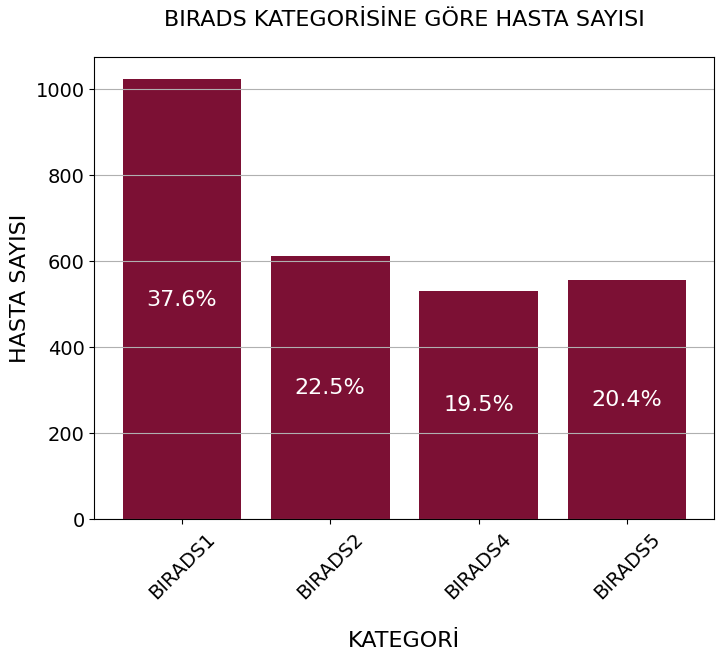

In [11]:
import os
import matplotlib.pyplot as plt
import pandas as pd

# Ana klasörlerin yolları
category_paths = {
    'BIRADS1': r'D:\mamografi-dataset\Kategori1',
    'BIRADS2': r'D:\mamografi-dataset\Kategori2',
    'BIRADS4': r'D:\mamografi-dataset\Kategori4',
    'BIRADS5': r'D:\mamografi-dataset\Kategori5'
}

# Her kategori için hasta sayısını saklamak için bir sözlük oluşturuluyor
patient_counts = {}

# Klasörler dolaşılarak hasta sayıları belirlenir
for category, path in category_paths.items():
    # Kategori klasöründeki hasta sayısı hesaplanıyor
    patient_counts[category] = len(next(os.walk(path))[1])

# Hasta sayılarıyla bir DataFrame oluştur
df = pd.DataFrame(list(patient_counts.items()), columns=['Category', 'Patient Count'])

# Toplam hasta sayısı
total_patients = df['Patient Count'].sum()

# Yüzdelik oranlar hesaplanıyor
df['Percentage'] = (df['Patient Count'] / total_patients) * 100

# Histogram grafiği çiziliyor
plt.figure(figsize=(8, 6))
bars = plt.bar(df['Category'], df['Patient Count'], color='#7C1034')
    
# Yüzdelik oranlar her sütunun ortasına eklenir
for bar in bars:
    height = bar.get_height()
    percentage = (height / total_patients) * 100
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height / 2,  # Barın tam ortası
        f'{percentage:.1f}%', 
        ha='center',
        va='center', 
        fontsize=16,
        color='white'
    )

plt.xlabel('\nKATEGORİ', fontsize=16)
plt.ylabel('HASTA SAYISI', fontsize=16)
plt.title('BIRADS KATEGORİSİNE GÖRE HASTA SAYISI\n', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y')

plt.show()

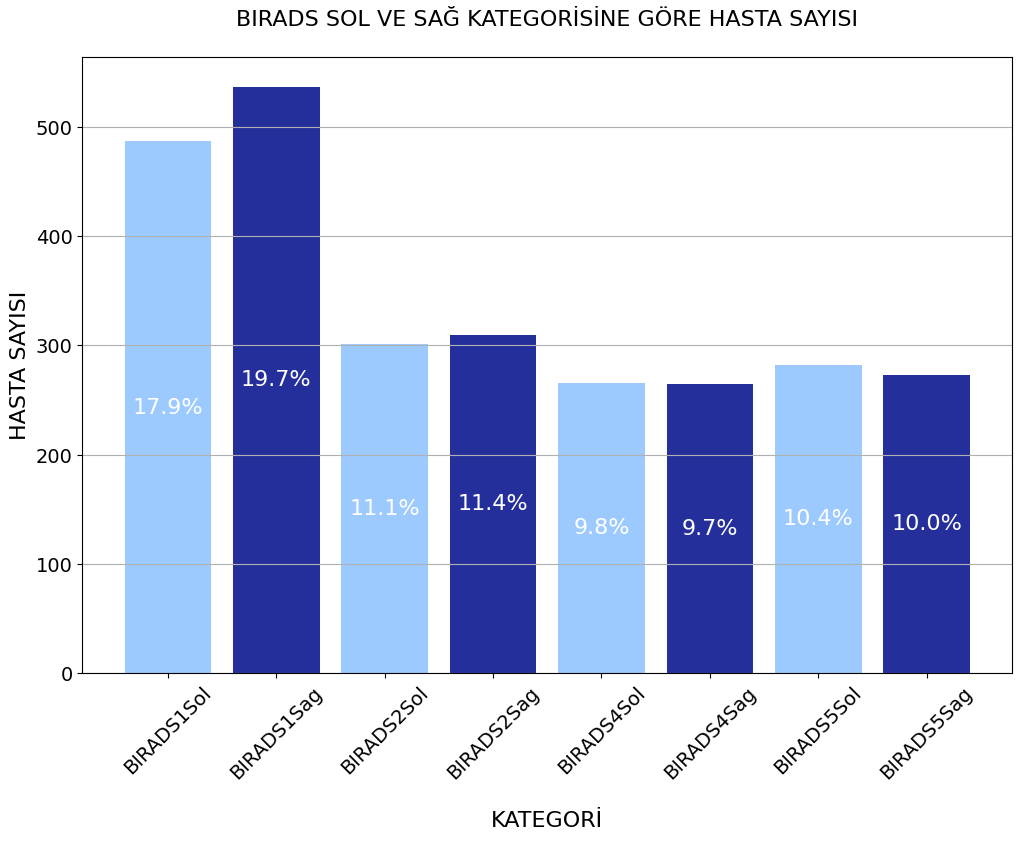

In [13]:
import os
import matplotlib.pyplot as plt
import pandas as pd

category_paths = {
    'BIRADS1Sol': r'D:\mamografi-dataset\Kategori1Sol',
    'BIRADS1Sag': r'D:\mamografi-dataset\Kategori1Sag',
    'BIRADS2Sol': r'D:\mamografi-dataset\Kategori2Sol',
    'BIRADS2Sag': r'D:\mamografi-dataset\Kategori2Sag',
    'BIRADS4Sol': r'D:\mamografi-dataset\Kategori4Sol',
    'BIRADS4Sag': r'D:\mamografi-dataset\Kategori4Sag',
    'BIRADS5Sol': r'D:\mamografi-dataset\Kategori5Sol',
    'BIRADS5Sag': r'D:\mamografi-dataset\Kategori5Sag',
}

patient_counts = {}

for category, path in category_paths.items():
    patient_counts[category] = len(next(os.walk(path))[1])

df = pd.DataFrame(list(patient_counts.items()), columns=['Category', 'Patient Count'])

total_patients = df['Patient Count'].sum()

df['Percentage'] = (df['Patient Count'] / total_patients) * 100

colors = []

for category in df['Category']:
    if 'Sag' in category:
        colors.append('#252F9C')  # Sağ taraf için renk
    else:
        colors.append('#9ccaff')  # Sol taraf için renk

plt.figure(figsize=(12, 8))
bars = plt.bar(df['Category'], df['Patient Count'], color=colors)

for bar in bars:
    height = bar.get_height()
    percentage = (height / total_patients) * 100
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height / 2,  # Barın tam ortası
        f'{percentage:.1f}%', 
        ha='center',
        va='center', 
        fontsize=16,
        color='white'
    )

plt.xlabel('\nKATEGORİ', fontsize=16)
plt.ylabel('HASTA SAYISI', fontsize=16)
plt.title('BIRADS SOL VE SAĞ KATEGORİSİNE GÖRE HASTA SAYISI\n', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y')

plt.show()

10- Verileri dataframe de görüntüleme işleminin yapılması

In [11]:
import pandas as pd
import numpy as np
import pydicom
from pydicom.pixel_data_handlers.util import apply_windowing
import matplotlib.pyplot as plt
from pathlib import Path

dcm_path_list=[]

def get_pixels_with_windowing(dcm_file):
    im = pydicom.dcmread(dcm_file)
    
    try:
        im.decompress('gdcm')
    except:
        pass

    data = im.pixel_array
    data = apply_windowing(data, im)
    
    if im.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data
    else:
        data = data - np.min(data)
        
    if np.max(data) != 0:
        data = data / np.max(data)
    data = (data * 255).astype(np.uint8)

    return data

def dosyalari_tara(klasor_yolu):
    klasor = Path(klasor_yolu)
    # Yalnızca belirtilen kategorilerdeki dosyaları tarayın
    allowed_categories = ['Kategori1', 'Kategori2', 'Kategori4', 'Kategori5']
    
    # Kategori klasörlerinde '.dcm' dosyalarını ara
    for kategori in allowed_categories:
        kategori_klasor = klasor / kategori  # Kategori klasör yolunu oluştur
        if kategori_klasor.exists():
            for dosya in kategori_klasor.rglob('*.dcm'):
                if dosya.is_file():
                    dcm_path_list.append(dosya.as_posix())


def find_file_path(row):
    patient_id = str(row["patient_id"])
    file_name = row["file_name"]
    bulunanlar = [eleman for eleman in dcm_path_list if patient_id in eleman and file_name in eleman]
    
    if len(bulunanlar) > 0:
        return bulunanlar[0]
    else:
        print(f"File not found for patient {patient_id} and file {file_name}")
        return None  # Dosya yolu bulunamadığında None döndür


def file_dimension_finder(row):
    if row["file_path"] is None:
        return np.nan, np.nan  # None değeri durumunda NaN döndür

    im = pydicom.dcmread(row["file_path"], stop_before_pixels=True)
    height = im.Rows
    width = im.Columns
    return height, width


new_column_names={"KATEGORİ":"category",
                  "HASTA ID":"patient_id",
                  "DOSYA ADI":"file_name",
                  "ETİKET ADI":"ann_class",
                  "ETİKET KOORDİNATLARI":"ann_coordinates"
                 }

df_raw=pd.read_csv("D:/mamografi-dataset/veribilgisi.csv", sep=";")
df_raw=df_raw.rename(columns=new_column_names)
df_raw["category"]=df_raw["category"].str[8:9].astype("int")

df_files = df_raw.groupby(['category', 'patient_id', 'file_name']).size().reset_index().drop(0,axis=1)

klasor_yolu = 'D:/mamografi-dataset'
dosyalari_tara(klasor_yolu)

df_files["file_path"] = df_files.apply(find_file_path, axis=1)

df_files[["raw_height","raw_width"]]=df_files.apply(file_dimension_finder, axis=1,result_type="expand")

df_raw = df_raw.merge(df_files[["patient_id","file_name","file_path", "raw_height","raw_width"]], on=["patient_id","file_name"], how="left")

df_raw["raw_height"] = df_raw["raw_height"].fillna(0).astype(int)
df_raw["raw_width"] = df_raw["raw_width"].fillna(0).astype(int)

coords = df_raw["ann_coordinates"].str.split(";", expand=True)
df_raw[["x1", "y1"]] = coords[0].str.split(",", expand=True).apply(pd.to_numeric, errors='coerce')
df_raw[["x2", "y2"]] = coords[2].str.split(",", expand=True).apply(pd.to_numeric, errors='coerce')
df_raw["x1"] = df_raw["x1"] + df_raw["raw_width"] / 2
df_raw["x2"] = df_raw["x2"] + df_raw["raw_width"] / 2
df_raw["y1"] = df_raw["y1"] + df_raw["raw_height"] / 2
df_raw["y2"] = df_raw["y2"] + df_raw["raw_height"] / 2

In [12]:
len(dcm_path_list)

5442

In [13]:
df_raw[df_raw["patient_id"] == 10080]

,category,patient_id,file_name,ann_class,ann_coordinates,file_path,raw_height,raw_width,x1,y1,x2,y2
158,1,10080,RCC.dcm,Normal,NaN,D:/mamografi-dataset/Kategori1/10080/RCC.dcm,2964,2364,NaN,NaN,NaN,NaN
159,1,10080,RMLO.dcm,Normal,NaN,D:/mamografi-dataset/Kategori1/10080/RMLO.dcm,2964,2364,NaN,NaN,NaN,NaN


In [14]:
df_raw[df_raw["patient_id"] == 10222]

,category,patient_id,file_name,ann_class,ann_coordinates,file_path,raw_height,raw_width,x1,y1,x2,y2
442,1,10222,LCC.dcm,Normal,NaN,D:/mamografi-dataset/Kategori1/10222/LCC.dcm,2370,1770,NaN,NaN,NaN,NaN
443,1,10222,LMLO.dcm,Normal,NaN,D:/mamografi-dataset/Kategori1/10222/LMLO.dcm,2370,1770,NaN,NaN,NaN,NaN


In [15]:
df_raw[df_raw["patient_id"] == 10494]

,category,patient_id,file_name,ann_class,ann_coordinates,file_path,raw_height,raw_width,x1,y1,x2,y2
986,1,10494,RMLO.dcm,Normal,NaN,D:/mamografi-dataset/Kategori1/10494/RMLO.dcm,2964,2364,NaN,NaN,NaN,NaN
987,1,10494,RCC.dcm,Normal,NaN,D:/mamografi-dataset/Kategori1/10494/RCC.dcm,2964,2364,NaN,NaN,NaN,NaN


11- Koordinatlar arası alanlarını hesaplama fonksiyonu

In [16]:
def space_between_coordinates(coordinates):
    if isinstance(coordinates, str):
        coordinates = coordinates.strip('[]') 
        dots = [list(map(float, p.split(','))) for p in coordinates.split(';')]
        if len(dots) == 4:
            x1, y1 = dots[0]
            x2, y2 = dots[1]
            x3, y3 = dots[2]
            x4, y4 = dots[3]
            length_y = abs(y2 - y1)  # Dikey mesafe
            length_x = abs(x4 - x1)  # Yatay mesafe
            return length_x * length_y  # Alanı hesapla (uzunluklar çarpılır)
    return None  # Koordinatlar beklenen formatta değilse

# Kare alanlarını dataframe'e ekle
df_raw['space_between_coordinates'] = df_raw['ann_coordinates'].apply(space_between_coordinates)

In [17]:
df_raw

,category,patient_id,file_name,ann_class,ann_coordinates,file_path,raw_height,raw_width,x1,y1,x2,y2,space_between_coordinates
0,1,10001,RCC.dcm,Normal,NaN,D:/mamografi-dataset/Kategori1/10001/RCC.dcm,2964,2364,NaN,NaN,NaN,NaN,NaN
1,1,10001,RMLO.dcm,Normal,NaN,D:/mamografi-dataset/Kategori1/10001/RMLO.dcm,2964,2364,NaN,NaN,NaN,NaN,NaN
2,1,10002,LCC.dcm,Normal,NaN,D:/mamografi-dataset/Kategori1/10002/LCC.dcm,2964,2364,NaN,NaN,NaN,NaN,NaN
3,1,10002,LMLO.dcm,Normal,NaN,D:/mamografi-dataset/Kategori1/10002/LMLO.dcm,2964,2364,NaN,NaN,NaN,NaN,NaN
4,1,10003,RCC.dcm,Normal,NaN,D:/mamografi-dataset/Kategori1/10003/RCC.dcm,2964,2364,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009,5,12719,LMLO.dcm,Kitle,"-693.9316,-327.6231;-693.9316,-134.1276;-531.2...",D:/mamografi-dataset/Kategori5/12719/LMLO.dcm,2964,2364,488.0684,1154.3769,650.78050,1347.87240,31484.059146
7010,5,12720,LCC.dcm,Kitle,"-727.322,-419.7589;-727.322,-50.79141;-379.371...",D:/mamografi-dataset/Kategori5/12720/LCC.dcm,2964,2364,454.6780,1062.2411,802.62840,1431.20859,128382.385732
7011,5,12720,LMLO.dcm,Kitle,"-595.595,-382.3951;-595.595,-64.80284;-289.678...",D:/mamografi-dataset/Kategori5/12720/LMLO.dcm,2964,2364,586.4050,1099.6049,892.32110,1417.19716,97156.585569
7012,5,12721,LCC.dcm,Kitle,"-524.7009,-961.3434;-524.7009,-541.2303;-65.25...",D:/mamografi-dataset/Kategori5/12721/LCC.dcm,2964,2364,657.2991,520.6566,1116.74856,940.76970,193020.736934


In [18]:
print(df_raw['category'].value_counts())

category
1    2048
5    2014
4    1598
2    1354
Name: count, dtype: int64


12- Kategori ve etiket adı sütunlarına göre gruplandır ve sayıları hesapla

In [19]:
category_label = df_raw.groupby(['category', 'ann_class']).size().unstack(fill_value=0)

In [20]:
category_label

ann_class,Kalsifikasyon,Kitle,Normal
category,,,
1,0,0,2048
2,0,726,628
4,784,795,19
5,725,1274,15


13- Histogram grafiği oluşturma

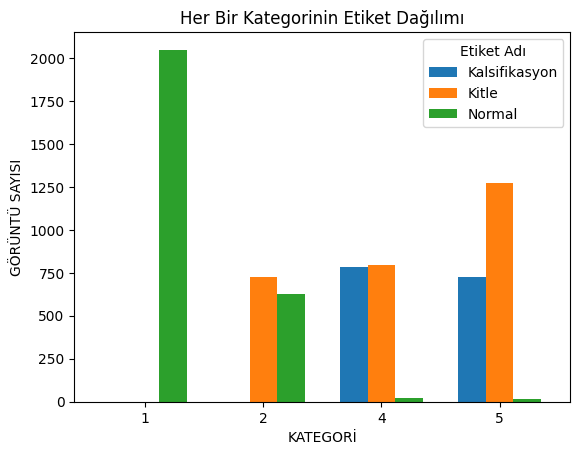

In [33]:
ax = category_label.plot(kind='bar', stacked=False, width=0.7)

plt.title('Her Bir Kategorinin Etiket Dağılımı')
plt.xlabel('KATEGORİ')
plt.ylabel('GÖRÜNTÜ SAYISI')

plt.xticks(rotation=0)

plt.legend(title='Etiket Adı')
plt.show()

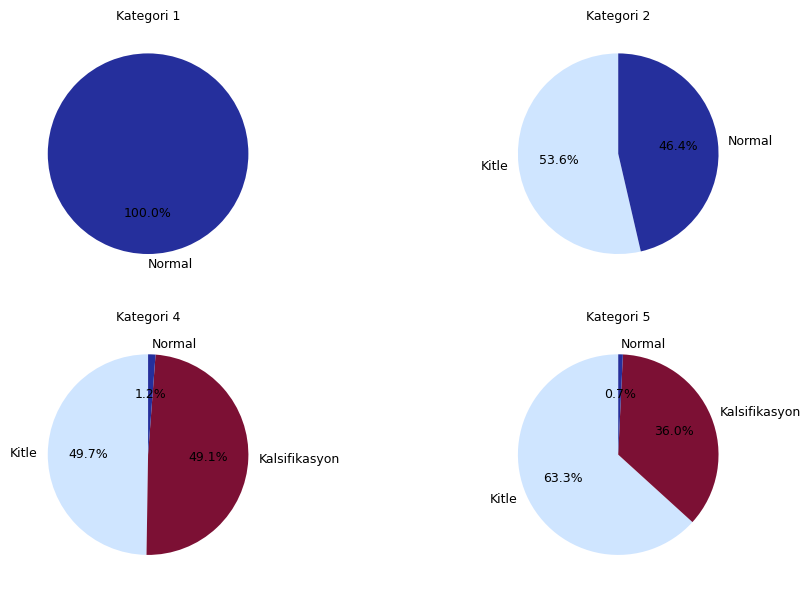

In [38]:
import matplotlib.pyplot as plt

# Kategorileri al
kategoriler = df_raw['category'].unique()

# Renkleri belirle
renkler = {'Kitle': '#CFE5FF', 'Kalsifikasyon': '#7C1034', 'Normal': '#252F9C'}

# Grafik için figür oluştur (2 sütun)
n_cols = 2
n_rows = -(-len(kategoriler) // n_cols)  # Satır sayısını hesapla, yukarı yuvarla

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(9, n_rows * 3))

# Her bir kategori için pasta grafiği oluştur
for i, kategori in enumerate(kategoriler):
    ax = axes[i // n_cols, i % n_cols]
    # Belirli bir kategori için etiket dağılımını filtrele
    etiket_dagilimi = df_raw[df_raw['category'] == kategori]['ann_class'].value_counts()

    # Pasta grafiği oluşturma
    ax.pie(
        etiket_dagilimi,
        labels=etiket_dagilimi.index,
        colors=[renkler.get(etiket, '#999999') for etiket in etiket_dagilimi.index],
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 9}
    )
    ax.set_title(f'Kategori {kategori}', fontsize=9)

# Boş grafik alanlarını kaldır
for j in range(len(kategoriler), n_rows * n_cols):
    fig.delaxes(axes[j // n_cols, j % n_cols])

# Grafik aralığını ayarla
plt.tight_layout()

# Grafik aralığını ayarla ve daire boyutunu büyüt
plt.subplots_adjust(wspace=0.2, hspace=0.2)  # Grafikler arası boşlukları ayarlama
for ax in axes.flat:
    ax.set_aspect('equal')  # Her bir daireyi düzgün şekilde göster

# Grafiği göster
plt.show()

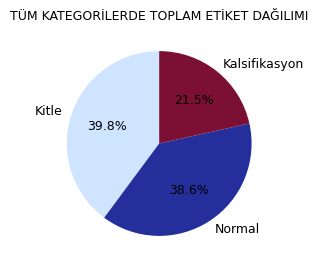

In [41]:
sum_label = df_raw['ann_class'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(
    sum_label,
    labels=sum_label.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#CFE5FF', '#252F9C', '#7C1034'],
    textprops={'fontsize': 9} 
)

plt.title('TÜM KATEGORİLERDE TOPLAM ETİKET DAĞILIMI', fontsize=9)

plt.gca().set_aspect('equal')
plt.show()

14- 
* Kalsifikasyon ve kitle etiketli görüntülerde ayrı ayrı Ortalama, maksimum ve minimum bounding box değerlerinin hesaplanması
* Minimum 10 ve maksimum 10 değerin `HASTA ID`'lerini bulma

In [44]:
import pandas as pd

df_kitle = df_raw[df_raw['ann_class'] == 'Kalsifikasyon']

# Ortalama, maksimum ve minimum değerleri hesaplama
mean_value = df_kitle['space_between_coordinates'].mean()
max_value = df_kitle['space_between_coordinates'].max()
min_value = df_kitle['space_between_coordinates'].min()

print(f"Ortalama: {mean_value}")
print(f"Maksimum: {max_value}")
print(f"Minimum: {min_value}", end="\n\n")

# Minimum ve maksimum değerlerin `HASTA ID`'lerini bulma
min_row = df_raw[df_raw['space_between_coordinates'] == min_value]
max_row = df_raw[df_raw['space_between_coordinates'] == max_value]

print(f"Minimum değer {min_value} için Hasta ID ve bilgileri:")
min_row

Ortalama: 89611.52595431724
Maksimum: 1646825.2253400001
Minimum: 703.6160035599992

Minimum değer 703.6160035599992 için Hasta ID ve bilgileri:


,category,patient_id,file_name,ann_class,ann_coordinates,file_path,raw_height,raw_width,x1,y1,x2,y2,space_between_coordinates
4510,4,12006,LMLO.dcm,Kalsifikasyon,"-481.691,-105.7279;-481.691,-134.3531;-457.110...",D:/mamografi-dataset/Kategori4/12006/LMLO.dcm,2964,2364,700.309,1376.2721,724.8893,1347.6469,703.616004


In [45]:
print(f"Maksimum değer {max_value} için Hasta ID ve bilgileri:")
max_row

Maksimum değer 1646825.2253400001 için Hasta ID ve bilgileri:


,category,patient_id,file_name,ann_class,ann_coordinates,file_path,raw_height,raw_width,x1,y1,x2,y2,space_between_coordinates
5618,5,12326,RMLO.dcm,Kalsifikasyon,"-96.26172,-685.5833;-96.26172,630.1667;1155.36...",D:/mamografi-dataset/Kategori5/12326/RMLO.dcm,2964,2364,1085.73828,796.4167,2337.363,2112.1667,1.646825e+06


In [47]:
min_rows = df_raw.nsmallest(10, 'space_between_coordinates')
max_rows = df_raw.nlargest(10, 'space_between_coordinates')

print(f"Minimum değer {min_value} için Hasta ID'leri:")
min_rows

Minimum değer 703.6160035599992 için Hasta ID'leri:


,category,patient_id,file_name,ann_class,ann_coordinates,file_path,raw_height,raw_width,x1,y1,x2,y2,space_between_coordinates
4510,4,12006,LMLO.dcm,Kalsifikasyon,"-481.691,-105.7279;-481.691,-134.3531;-457.110...",D:/mamografi-dataset/Kategori4/12006/LMLO.dcm,2964,2364,700.3090,1376.2721,724.8893,1347.64690,703.616004
2905,2,11413,LMLO.dcm,Kitle,"-616.3012,-31.1579;-616.3012,-5.82915;-645.007...",D:/mamografi-dataset/Kategori2/11413/LMLO.dcm,2964,2364,565.6988,1450.8421,536.9929,1476.17085,727.084565
6955,5,12701,LCC.dcm,Kalsifikasyon,"-1111.84,-824.1201;-1111.84,-803.4651;-1076.60...",D:/mamografi-dataset/Kategori5/12701/LCC.dcm,2964,2364,70.1600,657.8799,105.3950,678.53490,727.778925
6440,5,12553,LCC.dcm,Kalsifikasyon,"-519.7431,-114.8184;-519.7431,-82.81798;-494.8...",D:/mamografi-dataset/Kategori5/12553/LCC.dcm,2964,2364,662.2569,1367.1816,687.1461,1399.18202,796.464853
5930,5,12409,RMLO.dcm,Kalsifikasyon,"654.4428,195.8928;654.4428,226.618;681.5533,22...",D:/mamografi-dataset/Kategori5/12409/RMLO.dcm,2964,2364,1836.4428,1677.8928,1863.5533,1708.61800,832.975535
6764,5,12643,LMLO.dcm,Kitle,"-562.4767,123.4574;-562.4767,151.1212;-531.459...",D:/mamografi-dataset/Kategori5/12643/LMLO.dcm,2964,2364,619.5233,1605.4574,650.5403,1633.12120,858.048085
2900,2,11413,LCC.dcm,Kitle,"-784.3247,-491.1443;-784.3247,-464.1865;-751.9...",D:/mamografi-dataset/Kategori2/11413/LCC.dcm,2964,2364,397.6753,990.8557,430.0246,1017.81350,872.065960
5980,5,12428,RCC.dcm,Kalsifikasyon,"436.6092,253.1432;436.6092,274.9037;476.6942,2...",D:/mamografi-dataset/Kategori5/12428/RCC.dcm,2964,2364,1618.6092,1735.1432,1658.6942,1756.90370,872.269643
4849,4,12118,LMLO.dcm,Kalsifikasyon,"-894.8876,629.4331;-894.8876,655.652;-858.5195...",D:/mamografi-dataset/Kategori4/12118/LMLO.dcm,2964,2364,287.1124,2111.4331,323.4805,2137.65200,953.531577
5883,5,12397,RCC.dcm,Kalsifikasyon,"1065.323,-169.7021;1065.323,-135.5655;1095.928...",D:/mamografi-dataset/Kategori5/12397/RCC.dcm,2964,2364,2247.3230,1312.2979,2277.9280,1346.43450,1044.750643


In [48]:
print(f"Maksimum değer {max_value} için Hasta ID'leri:")
max_rows

Maksimum değer 1646825.2253400001 için Hasta ID'leri:


,category,patient_id,file_name,ann_class,ann_coordinates,file_path,raw_height,raw_width,x1,y1,x2,y2,space_between_coordinates
5264,5,12231,RCC.dcm,Kitle,"1146.274,465.7626;1146.274,-940.0059;-368.291,...",D:/mamografi-dataset/Kategori5/12231/RCC.dcm,3518,2800,2546.27400,2224.7626,1031.70900,818.9941,2.129128e+06
5267,5,12231,RMLO.dcm,Kitle,"603.9526,-1003.593;603.9526,582.1832;-691.7079...",D:/mamografi-dataset/Kategori5/12231/RMLO.dcm,3518,2800,2003.95260,755.4070,708.29210,2341.1832,2.054628e+06
5618,5,12326,RMLO.dcm,Kalsifikasyon,"-96.26172,-685.5833;-96.26172,630.1667;1155.36...",D:/mamografi-dataset/Kategori5/12326/RMLO.dcm,2964,2364,1085.73828,796.4167,2337.36300,2112.1667,1.646825e+06
4653,4,12048,LMLO.dcm,Kalsifikasyon,"-1010.637,-930.2083;-1010.637,642.0417;-20.261...",D:/mamografi-dataset/Kategori4/12048/LMLO.dcm,2964,2364,171.36300,551.7917,1161.73828,2124.0417,1.557118e+06
4652,4,12048,LCC.dcm,Kalsifikasyon,"60.48828,387.9167;60.48828,-778.2083;-1184.012...",D:/mamografi-dataset/Kategori4/12048/LCC.dcm,2964,2364,1242.48828,1869.9167,-2.01200,703.7917,1.451243e+06
4074,4,11863,RCC.dcm,Kitle,"40.94052,-891.5359;40.94052,255.434;1131.961,2...",D:/mamografi-dataset/Kategori4/11863/RCC.dcm,2964,2364,1222.94052,590.4641,2313.96100,1737.4340,1.251368e+06
3638,4,11723,RCC.dcm,Kalsifikasyon,"502.4491,-995.7093;502.4491,786.3055;1189.033,...",D:/mamografi-dataset/Kategori4/11723/RCC.dcm,2964,2364,1684.44910,486.2907,2371.03300,2268.3055,1.223503e+06
5651,5,12334,RMLO.dcm,Kalsifikasyon,"235.2909,172.8932;235.2909,1139.779;1388.225,1...",D:/mamografi-dataset/Kategori5/12334/RMLO.dcm,3518,2800,1635.29090,1931.8932,2788.22500,2898.7790,1.114756e+06
3557,4,11692,RMLO.dcm,Kitle,"-101.276,544.738;-101.276,-491.9441;906.6094,-...",D:/mamografi-dataset/Kategori4/11692/RMLO.dcm,3518,2800,1298.72400,2303.7380,2306.60940,1267.0559,1.044857e+06
2556,2,11257,RMLO.dcm,Kitle,"1322.943,-754.6111;1322.943,128.5577;2445.829,...",D:/mamografi-dataset/Kategori2/11257/RMLO.dcm,5355,4915,3780.44300,1922.8889,4903.32900,2806.0577,9.916979e+05


In [57]:
import pandas as pd

# 'kitle' etiketine sahip satırları filtreleme
kitle_df = df_raw[df_raw['ann_class'] == 'Kitle']

# Ortalama, maksimum ve minimum değerleri hesaplama
mean_value = kitle_df['space_between_coordinates'].mean()
max_value = kitle_df['space_between_coordinates'].max()
min_value = kitle_df['space_between_coordinates'].min()

print(f"Ortalama: {mean_value}")
print(f"Maksimum: {max_value}")
print(f"Minimum: {min_value}", end="\n\n")

# Minimum 10 ve maksimum 10 değerin `HASTA ID`'lerini bulma
min_rows = kitle_df.nsmallest(10, 'space_between_coordinates')
max_rows = kitle_df.nlargest(10, 'space_between_coordinates')

print(f"Minimum değer {min_value} için Hasta ID'leri:")
min_rows

Ortalama: 66496.1269068792
Maksimum: 2129127.7682025
Minimum: 727.084564625001

Minimum değer 727.084564625001 için Hasta ID'leri:


,category,patient_id,file_name,ann_class,ann_coordinates,file_path,raw_height,raw_width,x1,y1,x2,y2,space_between_coordinates
2905,2,11413,LMLO.dcm,Kitle,"-616.3012,-31.1579;-616.3012,-5.82915;-645.007...",D:/mamografi-dataset/Kategori2/11413/LMLO.dcm,2964,2364,565.6988,1450.84210,536.9929,1476.17085,727.084565
6764,5,12643,LMLO.dcm,Kitle,"-562.4767,123.4574;-562.4767,151.1212;-531.459...",D:/mamografi-dataset/Kategori5/12643/LMLO.dcm,2964,2364,619.5233,1605.45740,650.5403,1633.12120,858.048085
2900,2,11413,LCC.dcm,Kitle,"-784.3247,-491.1443;-784.3247,-464.1865;-751.9...",D:/mamografi-dataset/Kategori2/11413/LCC.dcm,2964,2364,397.6753,990.85570,430.0246,1017.81350,872.065960
2904,2,11413,LMLO.dcm,Kitle,"-632.3428,-79.28252;-632.3428,-42.13369;-598.5...",D:/mamografi-dataset/Kategori2/11413/LMLO.dcm,2964,2364,549.6572,1402.71748,583.4289,1439.86631,1254.579142
3111,2,11510,LMLO.dcm,Kitle,"-654.2921,-414.123;-654.2921,-365.1178;-624.05...",D:/mamografi-dataset/Kategori2/11510/LMLO.dcm,2964,2364,527.7079,1067.87700,557.9451,1116.88220,1481.780033
2917,2,11418,LCC.dcm,Kitle,"-1188.644,-782.8118;-1188.644,-721.2921;-1159....",D:/mamografi-dataset/Kategori2/11418/LCC.dcm,2964,2364,-6.6440,699.18820,22.1520,760.70790,1771.521281
4804,4,12105,LMLO.dcm,Kitle,"-1044.27,182.6757;-1044.27,225.3312;-1002.737,...",D:/mamografi-dataset/Kategori4/12105/LMLO.dcm,2964,2364,137.7300,1664.67570,179.2630,1707.33120,1771.610882
3436,4,11648,RMLO.dcm,Kitle,"581.1253,-155.3844;581.1253,-118.6268;631.2493...",D:/mamografi-dataset/Kategori4/11648/RMLO.dcm,2964,2364,1763.1253,1326.61560,1813.2493,1363.37320,1842.437942
5888,5,12398,RMLO.dcm,Kitle,"365.0377,-21.61761;365.0377,26.26726;403.6816,...",D:/mamografi-dataset/Kategori5/12398/RMLO.dcm,2964,2364,1547.0377,1460.38239,1585.6816,1508.26726,1850.458128
2948,2,11431,LCC.dcm,Kitle,"-925.2667,-1035.202;-925.2667,-993.1362;-879.9...",D:/mamografi-dataset/Kategori2/11431/LCC.dcm,2964,2364,256.7333,446.79800,302.0345,488.86380,1905.631219


In [58]:
print(f"Maksimum değer {max_value} için Hasta ID'leri:")
max_rows

Maksimum değer 2129127.7682025 için Hasta ID'leri:


,category,patient_id,file_name,ann_class,ann_coordinates,file_path,raw_height,raw_width,x1,y1,x2,y2,space_between_coordinates
5264,5,12231,RCC.dcm,Kitle,"1146.274,465.7626;1146.274,-940.0059;-368.291,...",D:/mamografi-dataset/Kategori5/12231/RCC.dcm,3518,2800,2546.27400,2224.7626,1031.70900,818.9941,2.129128e+06
5267,5,12231,RMLO.dcm,Kitle,"603.9526,-1003.593;603.9526,582.1832;-691.7079...",D:/mamografi-dataset/Kategori5/12231/RMLO.dcm,3518,2800,2003.95260,755.4070,708.29210,2341.1832,2.054628e+06
4074,4,11863,RCC.dcm,Kitle,"40.94052,-891.5359;40.94052,255.434;1131.961,2...",D:/mamografi-dataset/Kategori4/11863/RCC.dcm,2964,2364,1222.94052,590.4641,2313.96100,1737.4340,1.251368e+06
3557,4,11692,RMLO.dcm,Kitle,"-101.276,544.738;-101.276,-491.9441;906.6094,-...",D:/mamografi-dataset/Kategori4/11692/RMLO.dcm,3518,2800,1298.72400,2303.7380,2306.60940,1267.0559,1.044857e+06
2556,2,11257,RMLO.dcm,Kitle,"1322.943,-754.6111;1322.943,128.5577;2445.829,...",D:/mamografi-dataset/Kategori2/11257/RMLO.dcm,5355,4915,3780.44300,1922.8889,4903.32900,2806.0577,9.916979e+05
3556,4,11692,RCC.dcm,Kitle,"1223.373,597.532;1223.373,-247.1719;52.30655,-...",D:/mamografi-dataset/Kategori4/11692/RCC.dcm,3518,2800,2623.37300,2356.5320,1452.30655,1511.8281,9.892044e+05
6867,5,12673,LCC.dcm,Kitle,"-973.7942,-720.9803;-973.7942,302.372;-46.5957...",D:/mamografi-dataset/Kategori5/12673/LCC.dcm,2964,2364,208.20580,761.0197,1135.40426,1784.3720,9.488507e+05
6139,5,12473,LCC.dcm,Kitle,"-1034.006,513.0513;-1034.006,-596.9316;-262.51...",D:/mamografi-dataset/Kategori5/12473/LCC.dcm,2964,2364,147.99400,1995.0513,919.48900,885.0684,8.563463e+05
5954,5,12417,RCC.dcm,Kitle,"107.7698,-541.7554;107.7698,470.5068;871.3843,...",D:/mamografi-dataset/Kategori5/12417/RCC.dcm,3388,2720,1467.76980,1152.2446,2231.38430,2164.5068,7.729781e+05
6896,5,12682,LCC.dcm,Kitle,"-1198.238,334.8307;-1198.238,1416.522;-535.146...",D:/mamografi-dataset/Kategori5/12682/LCC.dcm,2964,2364,-16.23800,1816.8307,646.85380,2898.5220,7.172606e+05


15- 
* Outlier değerlerin Kitle ve Kalsifikasyon görüntülerinden ayrı ayrı %2 oranında (%1 min değerlerinden % 1 max değerlerinden olacak şekilde) çıkartılarak histogram grafiğinin görüntülenmesi

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# 'kitle' etiketine sahip satırları filtreleme
kitle_df = df_raw[df_raw['ann_class'] == 'Kitle']

# Veriyi küçükten büyüğe sıralayın
sorted_values = kitle_df['space_between_coordinates'].sort_values().values

# Ortalama, maksimum ve minimum değerleri hesaplama
mean_value = sorted_values.mean()
max_value = sorted_values.max()
min_value = sorted_values.min()

print(f"Toplam Kitle Sayısı: {len(sorted_values)}", end="\n\n")

print(f"Ortalama: {mean_value}")
print(f"Maksimum: {max_value}")
print(f"Minimum: {min_value}")
print(f"MAX-MİN FARKI: {max_value - min_value}", end="\n\n")


print(f"-----------------------------", end="\n\n")

# Yüzde 1'lik dilimler
n = len(sorted_values)
start_index = int(n * 0.010)
end_index = int(n * 0.990)

print(f"%98'lik Dilim Başlangıç İndex: {start_index}")
print(f"%98'lik Dilim Bitiş İndex: {end_index}", end="\n\n")

print(f"-----------------------------", end="\n\n")

# Yüzde 1'lik dilimleri çıkartın
trimmed_values = sorted_values[start_index:end_index]

print(f"%98'lik Dilim Toplam Kitle Sayısı: {len(trimmed_values)}", end="\n\n")

# Ortalama, maksimum ve minimum değerleri hesaplama
mean_value_trimmed = trimmed_values.mean()
max_value_trimmed = trimmed_values.max()
min_value_trimmed = trimmed_values.min()

print(f"Ortalama: {mean_value_trimmed}")
print(f"Maksimum: {max_value_trimmed}")
print(f"Minimum: {min_value_trimmed}")
print(f"MAX-MİN FARKI: {max_value_trimmed - min_value_trimmed}", end="\n\n")

Toplam Kitle Sayısı: 2795

Ortalama: 66496.1269068792
Maksimum: 2129127.7682025
Minimum: 727.084564625001
MAX-MİN FARKI: 2128400.683637875

-----------------------------

%98'lik Dilim Başlangıç İndex: 27
%98'lik Dilim Bitiş İndex: 2767

-----------------------------

%98'lik Dilim Toplam Kitle Sayısı: 2740

Ortalama: 59853.501645996264
Maksimum: 438361.6754566301
Minimum: 2693.358209520002
MAX-MİN FARKI: 435668.3172471101



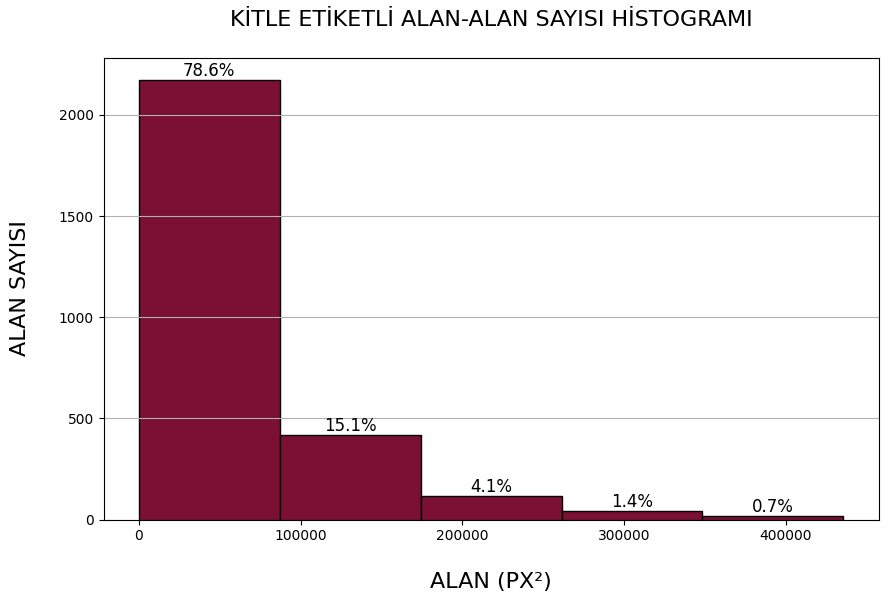

In [61]:
import numpy as np
# 5 eşit aralığa bölün
bin_edges = pd.cut(trimmed_values, bins=5, retbins=True)[1]

#MAX-MİN FARKI TRİMMED_VALUES
trimmed_range = max_value_trimmed - min_value_trimmed 

# Aralıkları manuel olarak belirleyin
bin_edges = np.arange(0, int(trimmed_range) + 1, int(trimmed_range) / 5 ) 
# Histogramı oluşturun
plt.figure(figsize=(10, 6))
plt.hist(sorted_values, bins=bin_edges, edgecolor='black', color='#7C1034')

# Histogramın üstüne her bir binin yüzdesini yazın
hist, _ = np.histogram(sorted_values, bins=bin_edges)
total_counts = hist.sum()

for i in range(len(hist)):
    plt.text(
        (bin_edges[i] + bin_edges[i + 1]) / 2, 
        hist[i], 
        f'{(hist[i] / total_counts) * 100:.1f}%', 
        ha='center', 
        va='bottom', 
        fontsize=12
    )

plt.xlabel('\nALAN (PX²)', fontsize=16)
plt.ylabel('ALAN SAYISI\n', fontsize=16)
plt.title('KİTLE ETİKETLİ ALAN-ALAN SAYISI HİSTOGRAMI\n', fontsize=16)
plt.grid(axis='y')

# Grafiği gösterin
plt.show()


In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# 'Kalsifikasyon' etiketine sahip satırları filtreleme
kalsifikasyon_df = df_raw[df_raw['ann_class'] == 'Kalsifikasyon']

# Veriyi küçükten büyüğe sıralayın
sorted_values = kalsifikasyon_df['space_between_coordinates'].sort_values().values

# Ortalama, maksimum ve minimum değerleri hesaplama
mean_value = sorted_values.mean()
max_value = sorted_values.max()
min_value = sorted_values.min()

print(f"Toplam Kalsifikasyon Sayısı: {len(sorted_values)}", end="\n\n")

print(f"Ortalama: {mean_value}")
print(f"Maksimum: {max_value}")
print(f"Minimum: {min_value}")
print(f"MAX-MİN FARKI: {max_value - min_value}", end="\n\n")


print(f"-----------------------------", end="\n\n")

# Yüzde 1'lik dilimler
n = len(sorted_values)
start_index = int(n * 0.010)
end_index = int(n * 0.990)

print(f"%98'lik Dilim Başlangıç İndex: {start_index}")
print(f"%98'lik Dilim Bitiş İndex: {end_index}", end="\n\n")

print(f"-----------------------------", end="\n\n")

# Yüzde 1'lik dilimleri çıkartın
trimmed_values = sorted_values[start_index:end_index]

print(f"%98'lik Dilim Toplam Kalsifikasyon Sayısı: {len(trimmed_values)}", end="\n\n")

# Ortalama, maksimum ve minimum değerleri hesaplama
mean_value_trimmed = trimmed_values.mean()
max_value_trimmed = trimmed_values.max()
min_value_trimmed = trimmed_values.min()

print(f"Ortalama: {mean_value_trimmed}")
print(f"Maksimum: {max_value_trimmed}")
print(f"Minimum: {min_value_trimmed}")
print(f"MAX-MİN FARKI: {max_value_trimmed - min_value_trimmed}", end="\n\n")

Toplam Kalsifikasyon Sayısı: 1509

Ortalama: 89611.52595431724
Maksimum: 1646825.2253400001
Minimum: 703.6160035599992
MAX-MİN FARKI: 1646121.6093364402

-----------------------------

%98'lik Dilim Başlangıç İndex: 15
%98'lik Dilim Bitiş İndex: 1493

-----------------------------

%98'lik Dilim Toplam Kalsifikasyon Sayısı: 1478

Ortalama: 80333.10202708495
Maksimum: 736053.3428741699
Minimum: 1703.556175860001
MAX-MİN FARKI: 734349.7866983099



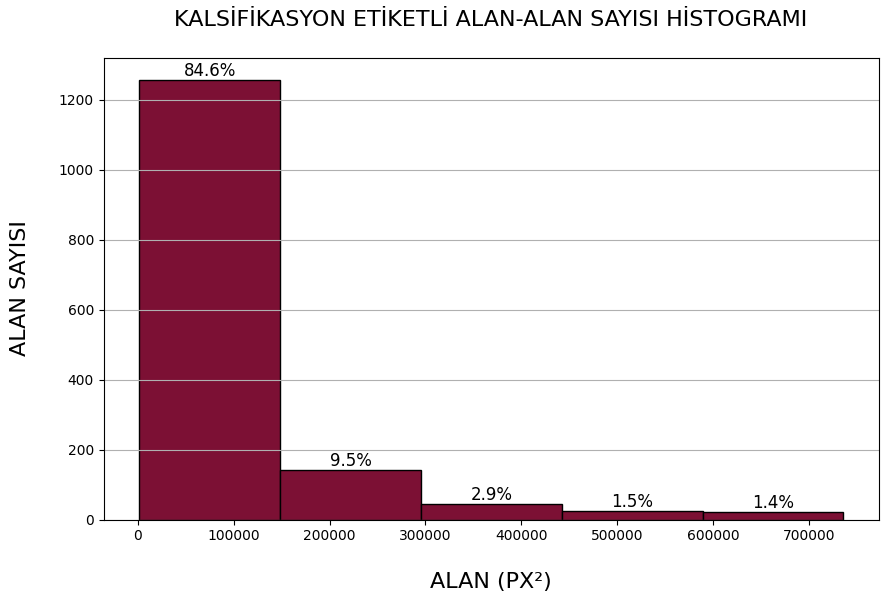

In [64]:
# 5 eşit aralığa bölün
bin_edges = pd.cut(trimmed_values, bins=5, retbins=True)[1]

# Histogramı oluşturun
plt.figure(figsize=(10, 6))
plt.hist(sorted_values, bins=bin_edges, edgecolor='black', color='#7C1034')

# Histogramın üstüne her bir binin yüzdesini yazın
hist, _ = np.histogram(sorted_values, bins=bin_edges)
total_counts = hist.sum()

for i in range(len(hist)):
    plt.text(
        (bin_edges[i] + bin_edges[i + 1]) / 2, 
        hist[i], 
        f'{(hist[i] / total_counts) * 100:.1f}%', 
        ha='center', 
        va='bottom', 
        fontsize=12
    )

plt.xlabel('\nALAN (PX²)', fontsize=16)
plt.ylabel('ALAN SAYISI\n', fontsize=16)
plt.title('KALSİFİKASYON ETİKETLİ ALAN-ALAN SAYISI HİSTOGRAMI\n', fontsize=16)
plt.grid(axis='y')

# Grafiği gösterin
plt.show()